In [ ]:
#code to plot an ellipse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.generic import build_circle
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma

In [2]:
a = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')#anticyclonic eddy data
c = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
#a = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
#c = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
SSH_data = xr.open_dataset('/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004010100_t000.nc')

File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'


In [2]:
from matplotlib import pyplot as plt
from numpy import cos, linspace, radians, sin

from py_eddy_tracker import data
from py_eddy_tracker.generic import coordinates_to_local, local_to_coordinates
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.poly import fit_circle_, fit_ellipse

def build_circle(x0, y0, r):
    angle = radians(linspace(0, 360, 50))
    x_norm, y_norm = cos(angle), sin(angle)
    return local_to_coordinates(x_norm * r, y_norm * r, x0, y0)


def build_ellipse(x0, y0, a, b, theta):
    angle = radians(linspace(0, 360, 50))
    x = a * cos(theta) * cos(angle) - b * sin(theta) * sin(angle)
    y = a * sin(theta) * cos(angle) + b * cos(theta) * sin(angle)
    return local_to_coordinates(x, y, x0, y0)

In [3]:
a = EddiesObservations.load_file('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_20030101.nc')
xs, ys = a.contour_lon_s, a.contour_lat_s
x, y = xs[0], ys[0]
x0_, y0_ = x.mean(), y.mean()
x_, y_ = coordinates_to_local(x, y, x0_, y0_)
x0, y0, a, b, theta = fit_ellipse(x_, y_)
x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
z,z0= build_ellipse(x0, y0, a, b, theta)
print(z)
print
#print(xs)


'''
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Anticyclonic Eddies with circle and ellipse, a=a/1.2, b=b/1.2',fontsize=20,fontweight='bold')

j = 1
for i in np.arange(0,11,1):
    x, y = xs[i], ys[i]
    x0_, y0_ = x.mean(), y.mean()
    x_, y_ = coordinates_to_local(x, y, x0_, y0_)
    ax = fig.add_subplot(4, 4, j)
    ax.grid(), ax.set_aspect("equal")
    ax.plot(x, y, label="original contour", color="black")
    x0, y0, a, b, theta = fit_ellipse(x_, y_)
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    #m=a/1.2
    #n=b/1.2
    w=-2*(4000)+a
    h=-2*(4000)+b
    ax.plot(*build_ellipse(x0, y0, a, b, theta), label="original ellipse", color="green")
    ax.plot(*build_ellipse(x0, y0, w, h, theta), label=" shrunk ellipse", color="blue")
    x0, y0, radius, shape_error = fit_circle_(x_, y_)
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    ax.plot(*build_circle(x0, y0, radius), label="circle", color="red", lw=0.5)
    #_= ax.legend(loc="best")
    if j == 16:
        break
    j += 1
_= ax.legend(loc=9,bbox_to_anchor=(1.6,.8),fontsize=15)#,borderpad=2
'''

[-94.03132664 -94.11706691 -94.22604719 -94.35646096 -94.50612413
 -94.67251365 -94.85281342 -95.04396637 -95.24273136 -95.4457436
 -95.6495769  -95.85080633 -96.04606971 -96.23212661 -96.40591363
 -96.5645949  -96.70560707 -96.8266982  -96.92596019 -97.00185453
 -97.05323145 -97.07934243 -97.07984652 -97.05481039 -97.00470279
 -96.9303835  -96.83308712 -96.71440224 -96.57624611 -96.42083526
 -96.25065239 -96.06840988 -95.87701026 -95.67950406 -95.47904532
 -95.27884532 -95.08212488 -94.8920657  -94.71176137 -94.54416858
 -94.39205912 -94.25797344 -94.14417661 -94.05261729 -93.98489079
 -93.94220701 -93.92536412 -93.93472893 -93.97022464 -94.03132664]


'\nfig = plt.figure(figsize=(15, 15))\nfig.suptitle(\'Anticyclonic Eddies with circle and ellipse, a=a/1.2, b=b/1.2\',fontsize=20,fontweight=\'bold\')\n\nj = 1\nfor i in np.arange(0,11,1):\n    x, y = xs[i], ys[i]\n    x0_, y0_ = x.mean(), y.mean()\n    x_, y_ = coordinates_to_local(x, y, x0_, y0_)\n    ax = fig.add_subplot(4, 4, j)\n    ax.grid(), ax.set_aspect("equal")\n    ax.plot(x, y, label="original contour", color="black")\n    x0, y0, a, b, theta = fit_ellipse(x_, y_)\n    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)\n    #m=a/1.2\n    #n=b/1.2\n    w=-2*(4000)+a\n    h=-2*(4000)+b\n    ax.plot(*build_ellipse(x0, y0, a, b, theta), label="original ellipse", color="green")\n    ax.plot(*build_ellipse(x0, y0, w, h, theta), label=" shrunk ellipse", color="blue")\n    x0, y0, radius, shape_error = fit_circle_(x_, y_)\n    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)\n    ax.plot(*build_circle(x0, y0, radius), label="circle", color="red", lw=0.5)\n    #_= ax.legend(loc="best")\

In [15]:
a = EddiesObservations.load_file(anti_files[2])
print(np.shape(a))
print(len(a))

(7,)
7


We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc


12746
3187
0.35093418
nan
(array([], dtype=int64), array([], dtype=int64))


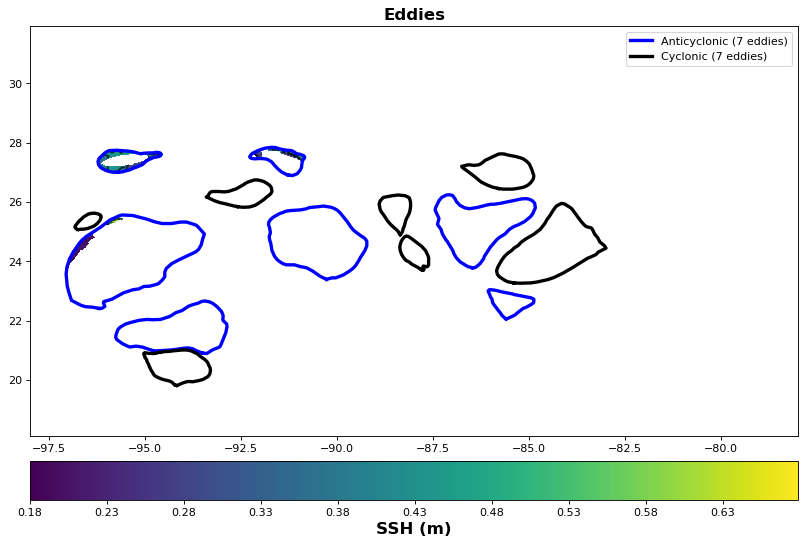

In [10]:
sat_files = sorted(glob.glob('/data/watkinson/Fall2022/Sat_data/1day_regrid/*.nc'))
#sat_files = sat_files[0:8]
anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))

cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))

SSH_files = sorted(glob.glob('/data/watkinson/Fall2022/SSH_data/Cropped_SSH_Data/*.nc'))
#sat_data = RegularGridDataset((SSH_files[2]),
    #"lon",
    #"lat")
a = EddiesObservations.load_file(anti_files[2])
######Cyclonic data

c = EddiesObservations.load_file(cycl_files[2])
#print(c)


 ###### Sat data
sat_data = RegularGridDataset((sat_files[2]),
    "lon",
    "lat")

from matplotlib.path import Path
from numpy import ones
from py_eddy_tracker.poly import create_vertice
x_name_anti, y_name_anti = a.intern(False)# We will use the outter effective contour and not the inner speed contour
#print(x_name_anti[0])
adt_anti = sat_data.grid("chlor_a")
#print(adt_anti)
mask_anti = ones(adt_anti.shape, dtype="bool")#creates boolean array to use in masking values for anticyclonic eddies
mask_anti2 = ones(adt_anti.shape, dtype="bool")
######takes the vertice points that defines the eddy edge and finds i,j pixels outside of those vertices

for eddy in a:
    i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
    #print(eddy[x_name_anti])
    #print(j)
    mask_anti[i, j] = False
adt_anti.mask[:] = mask_anti

#print(np.count_nonzero(mask_anti))
print(adt_anti.count())
#print(np.size(adt_anti))
#print(len(a))
#xs, ys = a.contour_lon_s, a.contour_lat_s
for eddy in a:
    #xs, ys = a.contour_lon_s, a.contour_lat_s
    xs, ys = eddy[x_name_anti], eddy[y_name_anti]
    #print(xs)
    #x, y = xs[eddy], ys[eddy]
    #x, y = xs[i],ys[i]
    x0_, y0_ = xs.mean(), ys.mean()
    x_, y_ = coordinates_to_local(xs, ys, x0_, y0_)
    x0, y0, a, b, theta = fit_ellipse(x_, y_)
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    w=-2*(10000)+a
    h=-2*(10000)+b
    z,z0= build_ellipse(x0, y0, w, h, theta)
    i2, j2 = Path(create_vertice(z, z0)).pixels_in(sat_data)
    mask_anti2[i2, j2] = False
adt_anti.mask[:] += ~mask_anti2
#print(np.count_nonzero(mask_anti2))
print(adt_anti.count())
    #i2, j2 = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
    #mask_anti[i2, j2] = False
    #adt_anti.mask[:] = mask_anti
#print(z)
'''
for eddy in c:
    i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
    mask_anti[i, j] = False
adt_anti.mask[:] = mask_anti 
'''
#adt_anti = adt_anti.mask.astype(int)
#sat_data2 = xr.open_dataset((sat_files[2]))
#chlor_anti  = sat_data2.chlor_a
#print(i,j)
adt_anti  = np.transpose(adt_anti)
#phyto_anti  = chlor_anti  * adt_anti 
#phyto_anti  = phyto_anti.where(phyto_anti  != 0)
#print(phyto)
#mean_anti = np.nanmean(phyto_anti)
#adt_anti  = adt_anti.where(adt_anti  != 0)
adt_anti = ma.masked_where(adt_anti==0,adt_anti)

mean_anti = np.nanmean(adt_anti)
#mean_anti  = np.atleast_1d(np.array(mean_anti ))
#anti_chlor_mean = np.concatenate([anti_chlor_mean,mean_anti])
#print(np.shape(phyto_anti))
#print(np.count_nonzero(adt_anti>1))
print(mean_anti)
#adt_anti  = adt_anti.where(adt_anti  != 0)
#adt_anti[adt_anti<0]== np.nan
fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_axes([.03,.03,.8,.8])
plt.title('Eddies',loc='center',fontsize=15,fontweight='bold')#,y=1.03)
      
SSH_data = xr.open_dataset(sat_files[0])
#a = EddiesObservations.load_file(directory_out + '/Anticyclonic' + '/Anticyclonic_' + date + '.nc')
#c = EddiesObservations.load_file(directory_out + '/Cyclonic' + '/Cyclonic_' + date + '.nc')
#load in lat, lon and SSh data for plot and print min and max SSH
lat=SSH_data.lat
#lon=SSH_data.lon+360
ax.set_xlim(-98, -78)
lon=SSH_data.lon
#ssh = SSH_data.adt
#print(np.min(ssh))
print(np.max(adt_anti))
print(np.where(adt_anti==97.65259))
#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)
cf = ax.contourf(lon2d,lat2d,adt_anti,cmap='viridis',levels=np.linspace(np.nanmin(adt_anti),np.nanmax(adt_anti),400))
cl = ax.contour(lon2d,lat2d,adt_anti,colors='k',alpha=.7)#,levels=np.arange(np.min(adt_anti),np.max(adt_anti),.1))
#Use to add legend with the number of anticyclonic and cyclonic eddies that day
a = EddiesObservations.load_file(anti_files[2])
a.display(ax, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
c.display(ax, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')
_= ax.legend(loc="best")

File was created with py-eddy-tracker version 'None' but software version is '3.6'


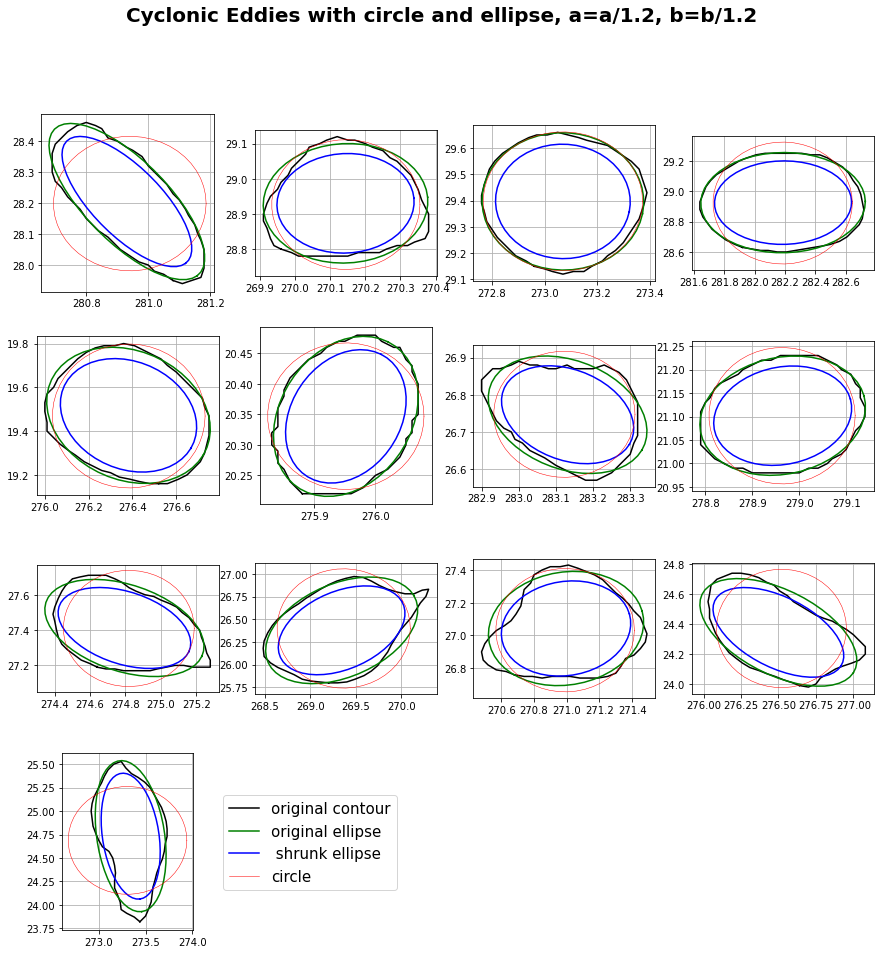

In [6]:
c = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
#a = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
xs, ys = c.contour_lon_s, c.contour_lat_s
#print(np.shape(xs))

fig = plt.figure(figsize=(15, 15))
fig.suptitle('Cyclonic Eddies with circle and ellipse, a=a/1.2, b=b/1.2',fontsize=20,fontweight='bold')

j = 1
for i in np.arange(0,13,1):
    x, y = xs[i], ys[i]
    x0_, y0_ = x.mean(), y.mean()
    x_, y_ = coordinates_to_local(x, y, x0_, y0_)
    ax = fig.add_subplot(4, 4, j)
    ax.grid(), ax.set_aspect("equal")
    ax.plot(x, y, label="original contour", color="black")
    x0, y0, a, b, theta = fit_ellipse(x_, y_)
    m=a/1.2
    n=b/1.2
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    ax.plot(*build_ellipse(x0, y0, a, b, theta), label="original ellipse", color="green")
    ax.plot(*build_ellipse(x0, y0, m, n, theta), label=" shrunk ellipse", color="blue")
    x0, y0, radius, shape_error = fit_circle_(x_, y_)
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    ax.plot(*build_circle(x0, y0, radius), label="circle", color="red", lw=0.5)
    #_= ax.legend(loc="best")
    if j == 16:
        break
    j += 1
_= ax.legend(loc=9,bbox_to_anchor=(1.9,.8),fontsize=15)#,borderpad=2

In [7]:
print(a)

90282.80049096604
